Importing Libraries and Dependencies

In [1]:
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Data Acquisition

In [2]:
cc_df_train = pd.read_csv('fraudTrain.csv', index_col=0)
cc_df_test = pd.read_csv('fraudTest.csv', index_col=0)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
cc_df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [4]:
# Data type information
cc_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

Data Analysis

In [5]:
# Checking for missing values
cc_df_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# Insights on the statistics of the data set
cc_df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,"1,296,675.00","417,192,042,079,726,656.00","1,308,806,447,000,240,384.00","60,416,207,185.00","180,042,946,491,150.00","3,521,417,320,836,166.00","4,642,255,475,285,942.00","4,992,346,398,065,154,048.00"
amt,"1,296,675.00",70.35,160.32,1.00,9.65,47.52,83.14,"28,948.90"
zip,"1,296,675.00","48,800.67","26,893.22","1,257.00","26,237.00","48,174.00","72,042.00","99,783.00"
lat,"1,296,675.00",38.54,5.08,20.03,34.62,39.35,41.94,66.69
long,"1,296,675.00",-90.23,13.76,-165.67,-96.80,-87.48,-80.16,-67.95
city_pop,"1,296,675.00","88,824.44","301,956.36",23.00,743.00,"2,456.00","20,328.00","2,906,700.00"
unix_time,"1,296,675.00","1,349,243,636.73","12,841,278.42","1,325,376,018.00","1,338,750,742.50","1,349,249,747.00","1,359,385,375.50","1,371,816,817.00"
merch_lat,"1,296,675.00",38.54,5.11,19.03,34.73,39.37,41.96,67.51
merch_long,"1,296,675.00",-90.23,13.77,-166.67,-96.90,-87.44,-80.24,-66.95
is_fraud,"1,296,675.00",0.01,0.08,0.00,0.00,0.00,0.00,1.00


In [7]:
cc_df_train['amt'].describe()

count   1,296,675.00
mean           70.35
std           160.32
min             1.00
25%             9.65
50%            47.52
75%            83.14
max        28,948.90
Name: amt, dtype: float64

Univariate Analysis for checking Target Imbalance

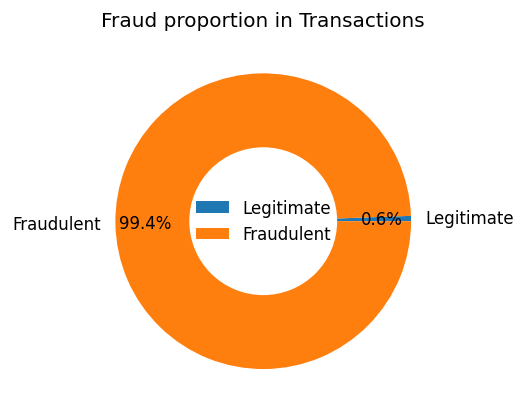

In [8]:
# Count the number of Legitimate and Fraudulent transactions
fraud_count = cc_df_train['is_fraud'].value_counts()[1]
legit_count = cc_df_train['is_fraud'].value_counts()[0]

labels = ["Legitimate", "Fraudulent"]
transactions = [fraud_count, legit_count]

# Donut chart to display the share of Legitimate and Fraudulent transactions
fig, chart_axes = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(transactions, labels=labels, autopct="%1.1f%%", pctdistance=0.8, explode=(0, 0))

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Fraud proportion in Transactions")
plt.legend(labels, loc="center", frameon=False)
plt.show()

Clearly there is a huge imbalance between the legitimate and fraudulent transactions

Multivariate Analysis

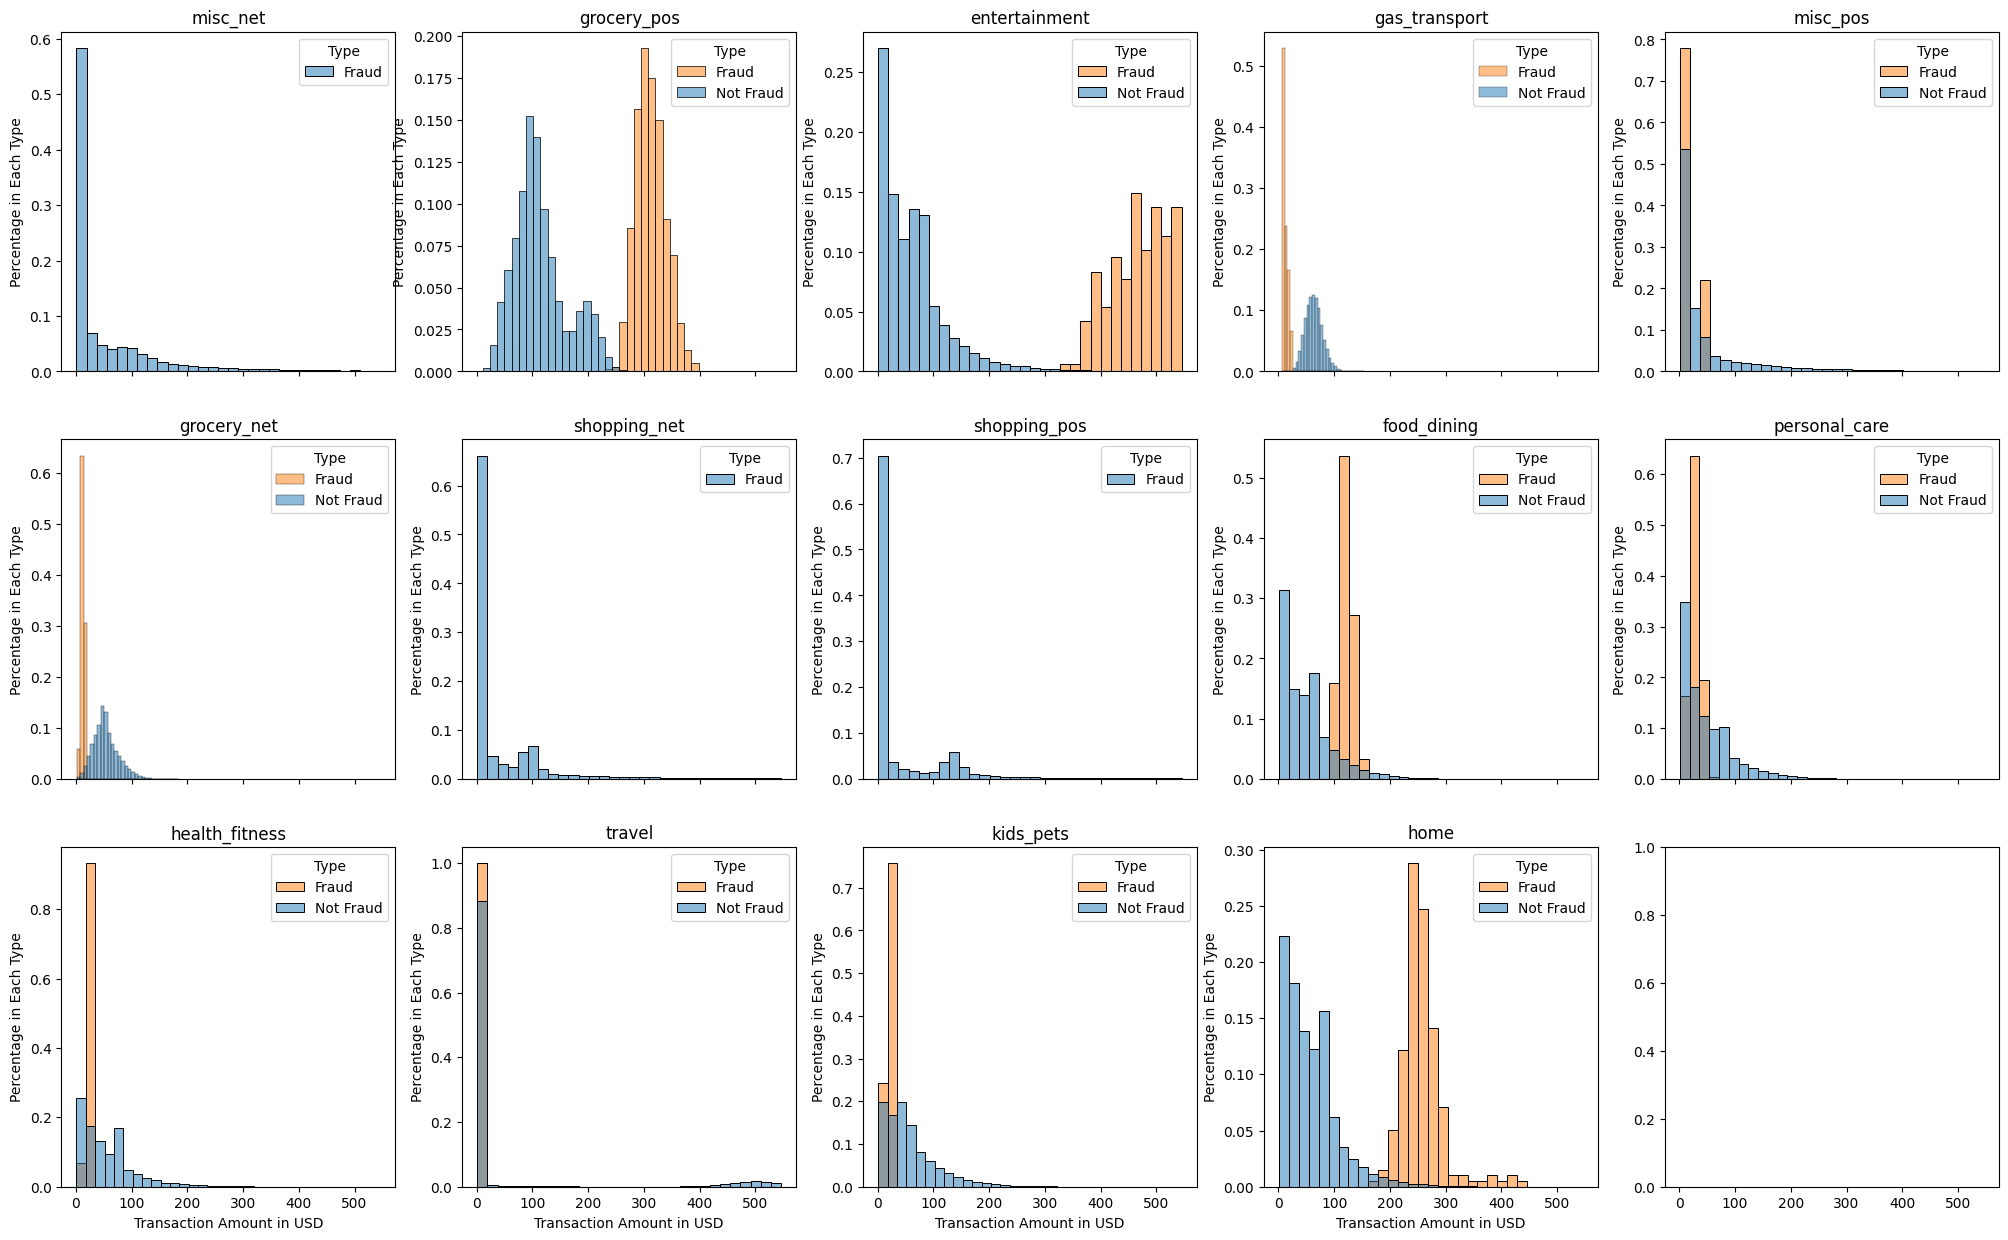

In [9]:
# Category wise analysis of fradulent transaction distribution
categories = cc_df_train['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols

    data_category = cc_df_train[cc_df_train['category'] == category]

    if num_rows == 1 and num_cols == 1:
        chart_axes = axes
    elif num_rows == 1 or num_cols == 1:
        chart_axes = axes[i]
    else:
        chart_axes = axes[row, col]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= cc_df_train["amt"].quantile(0.99)], hue='is_fraud', stat='probability', common_norm=False, bins=30, ax=chart_axes)

    chart_axes.set_ylabel('Percentage in Each Type')
    chart_axes.set_xlabel('Transaction Amount in USD')
    chart_axes.set_title(f'{category}')
    chart_axes.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.show()

In [10]:
# Non_fraud
non_fraud = cc_df_train[cc_df_train['is_fraud'] == 0]['category'].value_counts(normalize=True).to_frame().reset_index()
non_fraud.columns = ['category', 'not_fraud_percentual_vs_total']

# Fraud
fraud = cc_df_train[cc_df_train['is_fraud'] == 1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud.columns = ['category', 'fraud_percentage_vs_total']

# Merging two dataframes and calculating "fraud level"
non_fraud_vs_fraud = non_fraud.merge(fraud, on='category')
non_fraud_vs_fraud['fraud_level'] = non_fraud_vs_fraud['fraud_percentage_vs_total'] - non_fraud_vs_fraud['not_fraud_percentual_vs_total']

Text(0.5, 1.0, 'Fraud Level')

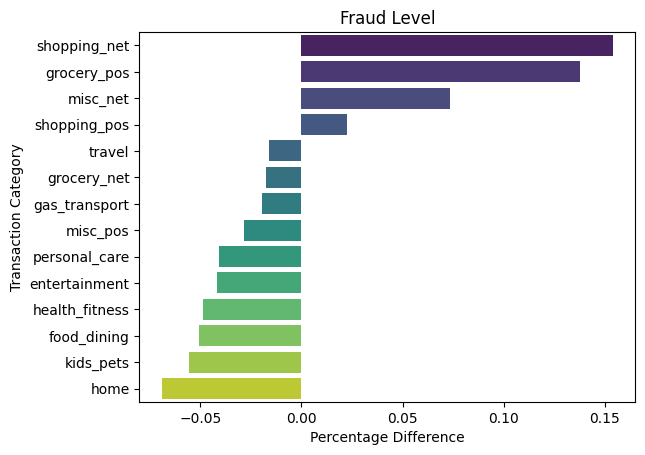

In [12]:
# Bar chart displaying the difference between nature of transactions in percent
chart = sns.barplot(y='category', x='fraud_level', data=non_fraud_vs_fraud.sort_values('fraud_level', ascending=False), palette='viridis')
chart.set_xlabel('Percentage Difference')
chart.set_ylabel('Transaction Category')
plt.title('Fraud Level')

Data Preprocessing - Feature Engineering

In [13]:
def feature_process(df):
    delete_cols = ['merchant','first','last','street','zip','unix_time','trans_num','cc_num']
    df.drop(columns=delete_cols, inplace=True)
   
    # Extrct
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['trans_date'] = df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    df['trans_date'] = pd.to_datetime(df['trans_date'])
    df['trans_month'] = df['trans_date'].dt.month
    df['trans_year'] = df['trans_date'].dt.year
    
    df['dob'] = pd.to_datetime(df['dob'])
    #Calculate Age of each individual
    df["age"] = (df["trans_date"] - df["dob"]).dt.days //365

    delete_cols_2 = ['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date']
    
    df['gender'] = df['gender'].map({'M': 1, 'F': 0})
    df['gender'] = df['gender'].astype(int)
    df['lat_dis'] = abs(df['lat']-df['merch_lat'])
    df['long_dis'] = abs(df['long']-df['merch_long'])
    
    df = pd.get_dummies(df,columns=['category'])
    df = df.drop(columns=delete_cols_2)

    return df

In [14]:
# Preparing Training and Testing Data
cc_df_train_ft = feature_process(cc_df_train)
cc_df_test_ft = feature_process(cc_df_test)

X_train, y_train = cc_df_train_ft.drop('is_fraud', axis=1), cc_df_train_ft['is_fraud']
X_test, y_test = cc_df_test_ft.drop('is_fraud', axis=1), cc_df_test_ft['is_fraud']

In [15]:
# Data Transformation using Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model Training and Performance Evaluation

In [16]:
def modelPerformanceEvaluation(model, y_test, y_pred):
    print(f'{model}\n')
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('\nConfusion Matrix:\n')
    plt.figure(figsize=(5, 3.5))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('\nClassification Report:\n')
    print(class_report)

Logistic Regression

Accuracy:  0.9956164896287513

Confusion Matrix:



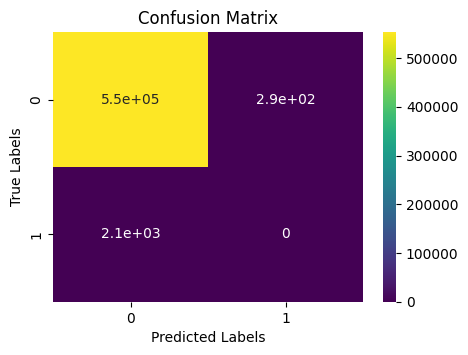


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [17]:
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(X_train,y_train)
y_pred_lr = Logistic_Regression.predict(X_test)

modelPerformanceEvaluation('Logistic Regression', y_test, y_pred_lr)

Decision Tree

Accuracy:  0.9965216233384139

Confusion Matrix:



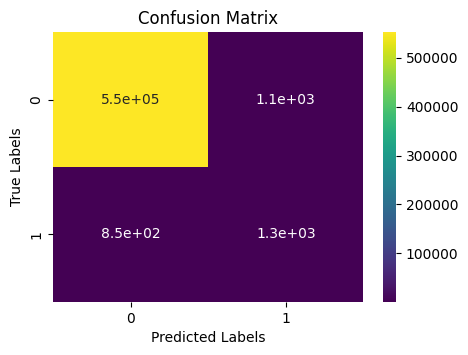


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.60      0.57      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719



In [18]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train,y_train)
y_pred_dt = Decision_Tree.predict(X_test)

modelPerformanceEvaluation('Decision Tree', y_test, y_pred_dt)

Random Forest

Accuracy:  0.9980277802270572

Confusion Matrix:



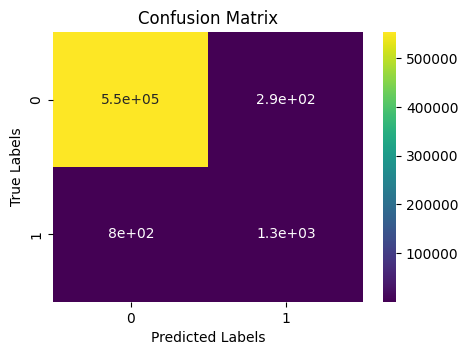


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.62      0.71      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.81      0.85    555719
weighted avg       1.00      1.00      1.00    555719



In [19]:
Random_Forest = RandomForestClassifier(random_state=42, n_jobs=-1)
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)

modelPerformanceEvaluation('Random Forest', y_test, y_pred_rf)

From the above results produced we can conlude the efficiencies of the models are as follows,

Random Forest (99.80%) > Decision Trees (99.65%) > Logistic Regression (99.56%)

Random Forest Classifier produces the most efficient model among the three models for prediction of Fraudulent Credit Card transactions